# Import Libraries

In [50]:
import warnings
warnings.filterwarnings('ignore')
import ftfy
import pandas as pd
import pandas_read_xml as pdx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

from math import exp
from numpy import sign 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.util import bigrams, trigrams, ngrams
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Conversations

## Train Set

In [2]:
df_conversations_train = pdx.read_xml(r'C:\Users\katle\Downloads\AIMTFI~1\TERM2S~1\AML240~1\CAPSTO~1\PAN12-~1\PAN12-~2\PAN12-~1\pan12-sexual-predator-identification-training-corpus-2012-05-01.xml', encoding="utf8")

In [3]:
df_conversations_train = pdx.fully_flatten(df_conversations_train)
df_conversations_train.head()

,conversations|conversation|@id,conversations|conversation|message|@line,conversations|conversation|message|author,conversations|conversation|message|time,conversations|conversation|message|text
0,e621da5de598c9321a1d505ea95e6a2d,1,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,Hola.
1,e621da5de598c9321a1d505ea95e6a2d,2,0158d0d6781fc4d493f243d4caa49747,03:20,hi.
2,e621da5de598c9321a1d505ea95e6a2d,3,0158d0d6781fc4d493f243d4caa49747,03:20,whats up?
3,e621da5de598c9321a1d505ea95e6a2d,4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,not a ton.
4,e621da5de598c9321a1d505ea95e6a2d,5,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,you?


In [4]:
df_conversations_train.columns = ['conversation_id','message_line','author','time','text']
df_conversations_train.head()

,conversation_id,message_line,author,time,text
0,e621da5de598c9321a1d505ea95e6a2d,1,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,Hola.
1,e621da5de598c9321a1d505ea95e6a2d,2,0158d0d6781fc4d493f243d4caa49747,03:20,hi.
2,e621da5de598c9321a1d505ea95e6a2d,3,0158d0d6781fc4d493f243d4caa49747,03:20,whats up?
3,e621da5de598c9321a1d505ea95e6a2d,4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,not a ton.
4,e621da5de598c9321a1d505ea95e6a2d,5,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,you?


## Test Set

In [5]:
df_conversations_test = pdx.read_xml(r'C:\Users\katle\Downloads\AIMTFI~1\TERM2S~1\AML240~1\CAPSTO~1\PAN12-~1\PAN12-~1\PAN12-~1\pan12-sexual-predator-identification-test-corpus-2012-05-17.xml', encoding="utf8")

In [6]:
df_conversations_test = pdx.fully_flatten(df_conversations_test)
df_conversations_test.head()

,conversations|conversation|@id,conversations|conversation|message|@line,conversations|conversation|message|author,conversations|conversation|message|time,conversations|conversation|message|text
0,affc2df0951b733d14ba92d19d9b7695,1,0a39f78bcb297ab0ebe8a29c28bfed89,15:24,bugmail: [Bug 6978] New: Mark eof-terminated s...
1,affc2df0951b733d14ba92d19d9b7695,2,60659cfda992013e610f285c46692d28,15:32,"Henri, can I ask you a Firefox build question ..."
2,affc2df0951b733d14ba92d19d9b7695,3,b8810fee2f4a71f849f3f7409546d1d9,15:34,"60659cfda992013e610f285c46692d28: sure, but I ..."
3,affc2df0951b733d14ba92d19d9b7695,4,60659cfda992013e610f285c46692d28,15:35,"It appears the build runs through, it creates ..."
4,affc2df0951b733d14ba92d19d9b7695,5,60659cfda992013e610f285c46692d28,15:35,"when I start it, I get my standard install of ..."


In [7]:
df_conversations_test.columns = ['conversation_id','message_line','author','time','text']
df_conversations_test.head()

,conversation_id,message_line,author,time,text
0,affc2df0951b733d14ba92d19d9b7695,1,0a39f78bcb297ab0ebe8a29c28bfed89,15:24,bugmail: [Bug 6978] New: Mark eof-terminated s...
1,affc2df0951b733d14ba92d19d9b7695,2,60659cfda992013e610f285c46692d28,15:32,"Henri, can I ask you a Firefox build question ..."
2,affc2df0951b733d14ba92d19d9b7695,3,b8810fee2f4a71f849f3f7409546d1d9,15:34,"60659cfda992013e610f285c46692d28: sure, but I ..."
3,affc2df0951b733d14ba92d19d9b7695,4,60659cfda992013e610f285c46692d28,15:35,"It appears the build runs through, it creates ..."
4,affc2df0951b733d14ba92d19d9b7695,5,60659cfda992013e610f285c46692d28,15:35,"when I start it, I get my standard install of ..."


## Predators ID

In [8]:
df_predators = pd.read_csv(r'C:\Users\katle\Downloads\AIMTFI~1\TERM2S~1\AML240~1\CAPSTO~1\PAN12-~1\PAN12-~2\PAN12-~1\pan12-sexual-predator-identification-training-corpus-predators-2012-05-01.txt')

In [9]:
df_predators.columns = ['author']
df_predators.head()

,author
0,00aac10b39157377c79b7700b7b832bf
1,02800e11fdb1b43595303709f2b38f8c
2,03957f443c7790f9642db14bbc59df11
3,04bfa707d3313179ef48177d7270938e
4,04d42f7bb1eb41605dea74a8711f9fd0


## Perverted Authors

In [10]:
df_perverted_authors = pd.read_csv(r'C:\Users\katle\Downloads\AIMTFI~1\TERM2S~1\AML240~1\CAPSTO~1\PAN12-~1\PAN12-~1\PAN12-~1\pan12-sexual-predator-identification-groundtruth-problem1.txt', header=None)

In [11]:
df_perverted_authors.columns = ['author']
df_perverted_authors.head()

,author
0,fadde1cb70225e72e78a5836425471f5
1,54b595f1920b5b1988e907ea693303b4
2,c483a618171c8a6bd691ea7f238f8e02
3,398cab8240d8a5a9f5f201115c0337c6
4,d2cd98d625d8f8d91f78497efd39a74f


## Suspicious Conversations

In [12]:
df_suspicious_conversations = pd.read_csv(r'C:\Users\katle\Downloads\AIMTFI~1\TERM2S~1\AML240~1\CAPSTO~1\PAN12-~1\PAN12-~1\PAN12-~1\pan12-sexual-predator-identification-groundtruth-problem2.txt', header=None, sep='\t')

In [13]:
df_suspicious_conversations.columns = ['conversation_id', 'message_line']
df_suspicious_conversations.head()

,conversation_id,message_line
0,f38606808ff2af1f258d158b23f8867a,61
1,f38606808ff2af1f258d158b23f8867a,63
2,f38606808ff2af1f258d158b23f8867a,72
3,f38606808ff2af1f258d158b23f8867a,76
4,f38606808ff2af1f258d158b23f8867a,89


In [14]:
df_conversations_full = pd.concat([df_conversations_train, df_conversations_test], axis=0)

# Exploratoring the Data

## checking the shape of each of our dataframe

In [15]:
# checking the shape of each of our dataframe
print(f'Conversations Full: {df_conversations_full.shape}')
print(f'Train Set: {df_conversations_train.shape}')
print(f'Test Set: {df_conversations_test.shape}')
print(f'Predators: {df_predators.shape}')
print(f'Perverted Authors: {df_perverted_authors.shape}')
print(f'Suspicious Conversations: {df_suspicious_conversations.shape}')

Conversations Full: (2962388, 5)
Train Set: (903607, 5)
Test Set: (2058781, 5)
Predators: (141, 1)
Perverted Authors: (254, 1)
Suspicious Conversations: (6478, 2)


## checking unique values 

In [16]:
# checking for null values
print(f'Conversations Full: \n==========\n{df_conversations_full.nunique()}')
print(f'\nTrain Set: \n==========\n{df_conversations_train.nunique()}')
print(f'\nTest Set: \n==========\n{df_conversations_test.nunique()}')
print(f'\nPredators: \n==========\n{df_predators.nunique()}')
print(f'\nPerverted Authors: \n==========\n{df_perverted_authors.nunique()}')
print(f'\nSuspicious Conversations: \n==========\n{df_suspicious_conversations.nunique()}')

Conversations Full: 
conversation_id     222055
message_line          1166
author              307693
time                  1440
text               1876627
dtype: int64

Train Set: 
conversation_id     66927
message_line         1166
author              97689
time                 1440
text               599154
dtype: int64

Test Set: 
conversation_id     155128
message_line          1024
author              218702
time                  1440
text               1325775
dtype: int64

Predators: 
author    141
dtype: int64

Perverted Authors: 
author    254
dtype: int64

Suspicious Conversations: 
conversation_id    834
message_line       148
dtype: int64


## checking for count of null values

In [17]:
# checking for null values
print(f'Conversations Full: \n==========\n{df_conversations_full.isnull().sum()}')
print(f'\nTrain Set: \n==========\n{df_conversations_train.isnull().sum()}')
print(f'\nTest Set: \n==========\n{df_conversations_test.isnull().sum()}')
print(f'\nPredators: \n==========\n{df_predators.isnull().sum()}')
print(f'\nPerverted Author: \n==========\n{df_perverted_authors.isnull().sum()}')
print(f'\nSuspicious Conversations: \n==========\n{df_suspicious_conversations.isnull().sum()}')

Conversations Full: 
conversation_id       0
message_line          0
author                0
time                  0
text               9429
dtype: int64

Train Set: 
conversation_id       0
message_line          0
author                0
time                  0
text               2976
dtype: int64

Test Set: 
conversation_id       0
message_line          0
author                0
time                  0
text               6453
dtype: int64

Predators: 
author    0
dtype: int64

Perverted Author: 
author    0
dtype: int64

Suspicious Conversations: 
conversation_id    0
message_line       0
dtype: int64


## checking the relationship of each dataframe

In [18]:
# all author ids that are on the predator list is in full conversations dataframe 
df_check_predators = df_predators.author.isin(df_conversations_full.author).astype(int)
df_check_predators.head()

0    1
1    1
2    1
3    1
4    1
Name: author, dtype: int32

In [19]:
df_check_predators.value_counts()

1    141
Name: author, dtype: int64

In [20]:
# all author ids that are on preverted authors list is in full conversations dataframe
df_check_perverted_authors = df_perverted_authors.author.isin(df_conversations_full.author).astype(int)
df_check_perverted_authors.head()

0    1
1    1
2    1
3    1
4    1
Name: author, dtype: int32

In [21]:
df_check_perverted_authors.value_counts()

1    254
Name: author, dtype: int64

In [22]:
# only one author id on predator list is in the perverted author list and vice versa
df_check_predator_perverted = df_predators.author.isin(df_perverted_authors.author).astype(int)
df_check_predator_perverted.value_counts()

0    140
1      1
Name: author, dtype: int64

In [23]:
df_check_perverted_predator = df_perverted_authors.author.isin(df_predators.author).astype(int)
df_check_perverted_predator.value_counts()

0    253
1      1
Name: author, dtype: int64

# Merging Datasets

In [24]:
df_predators['verdict'] = 'predator'
df_perverted_authors['author_type'] = 'perverted'
df_suspicious_conversations['conversation_type'] = 'suspicious'

In [25]:
df_final = pd.merge(df_conversations_full, df_predators, on='author', how='left')

In [26]:
df_final = pd.merge(df_final, df_perverted_authors, on='author', how='left')

In [27]:
df_final.head()

,conversation_id,message_line,author,time,text,verdict,author_type
0,e621da5de598c9321a1d505ea95e6a2d,1,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,Hola.,NaN,NaN
1,e621da5de598c9321a1d505ea95e6a2d,2,0158d0d6781fc4d493f243d4caa49747,03:20,hi.,NaN,NaN
2,e621da5de598c9321a1d505ea95e6a2d,3,0158d0d6781fc4d493f243d4caa49747,03:20,whats up?,NaN,NaN
3,e621da5de598c9321a1d505ea95e6a2d,4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,not a ton.,NaN,NaN
4,e621da5de598c9321a1d505ea95e6a2d,5,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,you?,NaN,NaN


In [28]:
df_final['message_line'] = df_final['message_line'].astype('int64')

In [29]:
df_final = pd.merge(df_final, df_suspicious_conversations, on=['conversation_id', 'message_line'], how='left')

In [30]:
df_final.head()

,conversation_id,message_line,author,time,text,verdict,author_type,conversation_type
0,e621da5de598c9321a1d505ea95e6a2d,1,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,Hola.,NaN,NaN,NaN
1,e621da5de598c9321a1d505ea95e6a2d,2,0158d0d6781fc4d493f243d4caa49747,03:20,hi.,NaN,NaN,NaN
2,e621da5de598c9321a1d505ea95e6a2d,3,0158d0d6781fc4d493f243d4caa49747,03:20,whats up?,NaN,NaN,NaN
3,e621da5de598c9321a1d505ea95e6a2d,4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,not a ton.,NaN,NaN,NaN
4,e621da5de598c9321a1d505ea95e6a2d,5,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,you?,NaN,NaN,NaN


In [31]:
df_final.isnull().sum()

conversation_id            0
message_line               0
author                     0
time                       0
text                    9429
verdict              2921307
author_type          2895873
conversation_type    2955910
dtype: int64

In [32]:
df_final['verdict'].fillna('non-predator', inplace=True)
df_final['author_type'].fillna('non-perverted', inplace=True)
df_final['conversation_type'].fillna('non-suspicious', inplace=True)

In [33]:
df_final['class_label'] = np.where((df_final['verdict'] == 'predator') | (df_final['author_type'] == 'perverted'), 'predatory', 'non-predatory')

In [34]:
df_final.head()

,conversation_id,message_line,author,time,text,verdict,author_type,conversation_type,class_label
0,e621da5de598c9321a1d505ea95e6a2d,1,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,Hola.,non-predator,non-perverted,non-suspicious,non-predatory
1,e621da5de598c9321a1d505ea95e6a2d,2,0158d0d6781fc4d493f243d4caa49747,03:20,hi.,non-predator,non-perverted,non-suspicious,non-predatory
2,e621da5de598c9321a1d505ea95e6a2d,3,0158d0d6781fc4d493f243d4caa49747,03:20,whats up?,non-predator,non-perverted,non-suspicious,non-predatory
3,e621da5de598c9321a1d505ea95e6a2d,4,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,not a ton.,non-predator,non-perverted,non-suspicious,non-predatory
4,e621da5de598c9321a1d505ea95e6a2d,5,97964e7a9e8eb9cf78f2e4d7b2ff34c7,03:20,you?,non-predator,non-perverted,non-suspicious,non-predatory


In [35]:
#df_final.to_csv(r'C:\Users\katle\Downloads\AIMTFI~1\Term 2 Summer\AML 2404 - AI and ML Lab\Capstone Project\predicting_predatory_messages.csv')

# Text Analytics

In [36]:
df_final = pd.read_csv(r'C:\Users\katle\Downloads\AIMTFI~1\Term 2 Summer\AML 2404 - AI and ML Lab\Capstone Project\predicting_predatory_messages.csv')

In [37]:
df_predatory = df_final.loc[df_final['class_label'] == 'predatory']

In [38]:
df_non_predatory = df_final.loc[df_final['class_label'] == 'non-predatory']

## Text Preprocessing

In [39]:
#Initiate text processors
lemmatizer = WordNetLemmatizer()
#tokenizer = word_tokenize()

#Stop words reference list
own_stopwords = ['u','ok','ur','',' ']
stop_words = set(stopwords.words('english') + own_stopwords)

In [40]:
#Function to clean strings
def clean_strings(phrase):
    #lowercase
    phrase = str(phrase).lower()
    
    #Handle contractions-- code by: Yann Dubois with some modification
    phrase = re.sub(r"[Ww]on\'t", "will not", phrase)
    phrase = re.sub(r"[Cc]an\'t", "cannot", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    #Remove special characters
    phrase = re.sub('[^A-Za-z ]+', ' ', phrase)
    
    return phrase

In [41]:
#Wordnet pos tags (to be used in pos-based lemmatization)
def get_wordnet_pos(token, tag):
    if tag.startswith('J'):
        return token, wordnet.ADJ
    elif tag.startswith('V'):
        return token, wordnet.VERB
    elif tag.startswith('N'):
        return token, wordnet.NOUN
    elif tag.startswith('R'):
        return token, wordnet.ADV
    else:
        return token, wordnet.NOUN

In [42]:
#Function to lemmatize strings with prework involved
##Prework: tokenize, tag pos, remove stop words
def lemmatize(phrase):
    
    #Clean strings-- based on previous function
    phrase = clean_strings(phrase)
    
    #Tokenize
    phrase = word_tokenize(phrase)
    
    #POS tagging
    ##Returns a list with of (token, pos_tag)
    pos_tags = nltk.pos_tag(phrase)
    
    #Transform to wordnet pos tags and filter out stop words
    pos_tags = [get_wordnet_pos(token, pos_tag) for token, pos_tag 
                in pos_tags if token not in stop_words]
    
    #Lemmatize
    lemma = [lemmatizer.lemmatize(token, tag) for token, tag in pos_tags]
    
    #Return value
    return lemma

In [43]:
def freq_words(strings, terms=30): 
    corpus = ' '.join([string for string in strings])
    corpus = corpus.split()
    fdist = nltk.FreqDist(corpus)
    word_freq = pd.DataFrame({'word':list(fdist.keys()), 
                              'count':list(fdist.values())}) 
    
    #Select top n most frequent words
    most_freq = word_freq.nlargest(columns='count', n=terms)
    
    #Visualize words and frequencies
    fig, ax = plt.subplots(figsize=(12,8))
    sns.barplot(data=most_freq, x='count', y='word', color='green')
    plt.tick_params(labelsize=16)
    plt.ylabel('')

In [ ]:
unigram=[]
bigram=[]
trigram=[]
fourgram=[]
fivegram=[]
tokenized_text = []
for sentence in sents_pre:
    sentence = sentence.lower()
    sequence = word_tokenize(sentence) 
    for word in sequence:
        if (word =='.'):
            sequence.remove(word) 
        else:
            unigram.append(word)
    tokenized_text.append(sequence) 
    trigram.extend(list(ngrams(sequence, 3)))  
#unigram, bigram, trigram, and fourgram models are created
    fourgram.extend(list(ngrams(sequence, 4)))
    fivegram.extend(list(ngrams(sequence, 5)))
def removal(x):     
#removes ngrams containing only stopwords
    y = []
    for pair in x:
        count = 0
        for word in pair:
            if word in stop_words:
                count = count or 0
            else:
                count = count or 1
        if (count==1):
            y.append(pair)
    return(y)
trigram = removal(trigram)
fourgram = removal(fourgram)             
fivegram = removal(fivegram)
freq_tri = nltk.FreqDist(trigram)
freq_four = nltk.FreqDist(fourgram)
freq_five = nltk.FreqDist(fivegram)
print("Most common n-grams: \n")
print ("Most common trigrams: ", freq_tri.most_common(10))
print ("\nMost common fourgrams: ", freq_four.most_common(10))
print ("\nMost common fivegrams: ", freq_five.most_common(10))

## Train and Test Split - WORK on this split!

In [44]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_final, test_size=0.33, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1984799
No. of testing examples: 977589


In [45]:
training_data['class_label'].value_counts()

non-predatory    1912989
predatory          71810
Name: class_label, dtype: int64

In [46]:
testing_data['class_label'].value_counts()

non-predatory    942191
predatory         35398
Name: class_label, dtype: int64

In [52]:
#Add new cols with transform strings, dont forget to change the column name
# NOTE! if all_data is tru, please run the commend_df['tokens'] and comments_df['lemma'] in QTconsole!
all_data = True 

if  all_data:
    #%qtconsole
    #please run the following code in the %qtconsole
    training_data['tokens'] = training_data['text'].apply(lemmatize)
    training_data['lemma'] = [' '.join(lemma) for lemma in training_data['tokens']]
else:
    training_data['tokens'] = training_data['text'].apply(lemmatize)
    training_data['lemma'] = [' '.join(lemma) for lemma in training_data['tokens']] 

In [ ]:
words = training_data['lemma'].tolist()
words

## Most frequent words on predatory and non-predatory dataset

In [53]:
df_predatory = training_data.loc[training_data['class_label'] == 'predatory']

In [54]:
df_non_predatory = training_data.loc[training_data['class_label'] == 'non-predatory']

In [55]:
df_predatory.head()

,Unnamed: 0,conversation_id,message_line,author,time,text,verdict,author_type,conversation_type,class_label,tokens,lemma
490494,490494,137ae99e0f6b1cbe63e865bfb1505291,311,37da9b4030b08843cded697d709165ee,13:23,ok,predator,non-perverted,non-suspicious,predatory,[],
682617,682617,4f2c9dc8e655bf3b5483b626771cdc37,12,62477e3c00adc3464999e6973e83fb52,22:30,iam ok,predator,non-perverted,non-suspicious,predatory,[iam],iam
2762308,2762308,d11d77095d8af4d325e5b9394e4f4aca,59,f7808b0404f746ef62d36250b04c9fd5,16:09,omg,non-predator,perverted,non-suspicious,predatory,[omg],omg
1516144,1516144,ccd4c56df24fae0cee5030a1bf8b6ec7,20,54b595f1920b5b1988e907ea693303b4,21:04,not yet,non-predator,perverted,non-suspicious,predatory,[yet],yet
622502,622502,95bfe454fc8f97c9c603f4afbe860105,75,c62283536cf6261e5ffbcb323c8a2571,23:09,well we better get some sleep,predator,non-perverted,non-suspicious,predatory,"[well, better, get, sleep]",well better get sleep


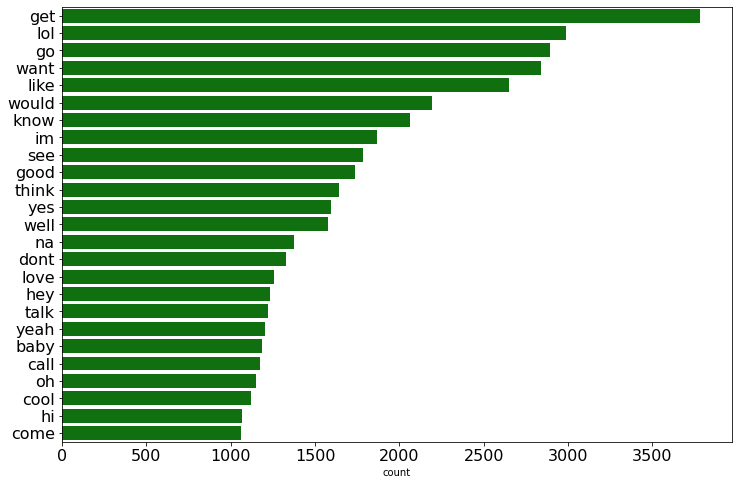

In [131]:
freq_words(df_predatory['lemma'], 25)

In [132]:
contain_values = df_non_predatory[df_non_predatory['lemma'].str.contains('see')]
contain_values['text']

2946472    excuses himself; his presence no longer seems ...
1440308    Wyleyrabbit: The only codebase I've seen worse...
1026391                                 I'd like to see that
2838331                            Let me see your sexy body
2390234    boy here...wanna see me taking shower? you sho...
                                 ...                        
2182827    ab7faae5d7b250ea8606486575f8f79c: Doesn't seem...
2656661    they like it because its easy to see something...
922924                               awww ok nite see u soon
56290                                                see you
1826526    19, female, Ohio..you? on Omegle cause Faceboo...
Name: text, Length: 42673, dtype: object

In [133]:
contain_values = df_non_predatory[df_non_predatory['lemma'].str.contains('baby')]
contain_values['text']

1281159    I am struck by extreme giggles at seeing famil...
2312245    wanna trade? and ohh baby you know exactly wha...
24119                                    justin bieber baby!
2293937                                  Hello, hello, baby;
231505     ohhh babyyy i wanna make you moannnn and screa...
                                 ...                        
1688876    baby it tastes so good...  i start teasing you...
602981                                          kk javi baby
2673725                why did the dead baby cross the road?
107523     tell me ill tell u how big my dick is baby i w...
1758877                                       yeah sure baby
Name: text, Length: 2842, dtype: object

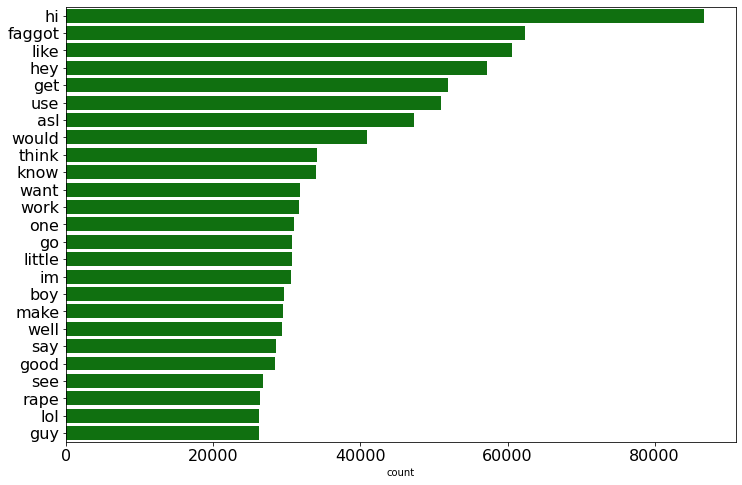

In [134]:
freq_words(df_non_predatory['lemma'], 25)

In [135]:
contain_values = df_non_predatory[df_non_predatory['lemma'].str.contains('faggot')]
contain_values['text']

573336                                           Faggot slut
2234285    suck my muslim chode you faggotsuck my muslim ...
630626                                                Faggot
2801752                                               faggot
2234287                      suck my muslim chode you faggot
                                 ...                        
1905978                                   &quot;faggot&quot;
1282635    whats the point of faggots, when they all just...
1282520    whats the point of faggots, when they all just...
2071258    FAGGOt FAGGOT FAGGOT FAGGOT FAGGOT FAGGOt FAGG...
1840917                                               faggot
Name: text, Length: 579, dtype: object

In [136]:
contain_values = df_non_predatory[df_non_predatory['lemma'].str.contains('rape')]
contain_values['text']

2471282                if you want to RAPE you got a problem
846614            ok, i want to cage baby deer and rape them
1115237                                          that's rape
1759564    69b0d3dfe919a6b860a9fac82de52a7e, FWIW, MediaW...
2519036                   Did rape not put you off sex then?
                                 ...                        
1187589                                     i want real rape
2192245                                I would rape you tho.
700365                                   Www.yourapedo.co.uk
394349                   like an html scraper MrConstantine?
1666394                                will rape me agian :(
Name: text, Length: 504, dtype: object

## Ngrams on predatory and non-predatory dataset

In [137]:
words = df_predatory['lemma'].tolist()
words

['',
 'iam',
 'omg',
 'yet',
 'well better get sleep',
 'listen give zip code',
 '',
 '',
 '',
 'k',
 'friend visit day',
 '',
 'arentcha',
 'like',
 'yeah would get hard dont want feel',
 'gas tank',
 'kows',
 'must eat alot fish stick',
 'p',
 '',
 'ewwhate',
 'lol ya',
 'sexy little girl',
 'awesome',
 'really would let molest daughter would',
 'whens bday',
 'bye sexy',
 'nan',
 'john',
 'name jerri',
 'cylinder like mustang something like',
 'r shave',
 'lol',
 'cool',
 'need get bed get get early ill talk later',
 'sweetheart',
 'yes',
 'go masturbate',
 'would pertend know lying',
 'middle',
 'r sweet',
 'ya say sorry get msg thanks',
 'wear short see bottom butt cheek stick',
 'oh kool',
 'map',
 'oh',
 'drive hour',
 'tell',
 'yes theyr yummy',
 'pleasure work',
 'sweetie il b back shortly',
 'would love exam closely lol',
 'loking female',
 'together absolutely sure go trip get knee stick head legseven happen unexpectedly',
 'hi',
 'trip',
 'still sleepy',
 'get hot tub backy

In [138]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:25]

(, )         932
(, lol)      190
(lol, )      189
(yes, )      102
(, yes)       81
(cool, )      81
(, cool)      69
(yeah, )      68
(, k)         68
(, hi)        65
(k, )         58
(hi, )        55
(oh, )        52
(, yeah)      51
(, oh)        49
(nan, )       47
(hey, )       46
(, nan)       41
(, hey)       38
(like, )      37
(good, )      35
(yea, )       34
(, sorry)     34
(, want)      32
(, think)     31
dtype: int64

In [139]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

(, , )          107
(, lol, )        25
(lol, , )        24
(, , lol)        18
(, , k)          15
(, , yes)        15
(, cool, )       15
(yes, , )        13
(, yes, )         9
(cool, , )        9
(lol, lol, )      8
(k, , )           8
(good, , )        8
(, oh, )          7
(, yeah, )        7
dtype: int64

In [140]:
(pd.Series(nltk.ngrams(words, 4)).value_counts())[:15]

(, , , )               12
(, lol, , )             5
(k, , , )               4
(, , , cool)            3
(, , , hi)              3
(, , , k)               3
(lol, , , )             3
(ya, , , )              2
(, k, , )               2
(, think, , )           2
(, , day, )             2
(, , , sweet dream)     2
(, , , know)            2
(, , lol, )             2
(, , , okay)            2
dtype: int64